# Analisis de las caracteristicas de los clientes

In [293]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Leemos los archivos

In [294]:
data_full = pd.read_csv('/content/application_record.csv')
status_credito = pd.read_csv('/content/credit_record.csv')

## Variables objetivo

In [295]:
# Agrupamos los dataset haciendo un merge por sus ID's
begin_month=pd.DataFrame(status_credito.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'Account age'})
data_full=pd.merge(data_full,begin_month,how='left',on='ID')

# De las clases que nos da el dataset, le damos un clasificacion
status_credito['dep_value'] = None
status_credito['dep_value'][status_credito['STATUS'] =='2']='Yes'
status_credito['dep_value'][status_credito['STATUS'] =='3']='Yes'
status_credito['dep_value'][status_credito['STATUS'] =='4']='Yes'
status_credito['dep_value'][status_credito['STATUS'] =='5']='Yes'

# Numero de ocurrencias al separar en dos clases
clases=status_credito.groupby('ID').count()
clases['dep_value'][clases['dep_value'] > 0]='Yes'
clases['dep_value'][clases['dep_value'] == 0]='No'
clases = clases[['dep_value']]
data_full = pd.merge(data_full,clases,how='inner',on='ID')
data_full['Is high risk']=data_full['dep_value']

# Clasificacion en un sistema binario de cliente 'riesgoso' o 'no riesgoso'
data_full.loc[data_full['Is high risk']=='Yes','Is high risk']=1
data_full.loc[data_full['Is high risk']=='No','Is high risk']=0
data_full.drop('dep_value',axis=1,inplace=True)
pd.options.mode.chained_assignment = None # hide warning SettingWithCopyWarning

## Dividir los datos entre entrenamiento y test

In [296]:
# División de los datos en los que serviran de entrenamiento y los de prueba
def data_split(df, test_size):
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
    return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [297]:
train_original, test_original = data_split(data_full, 0.2)

In [298]:
# creating a copy of the dataset so that the original stays untouched
cc_train_copy = train_original.copy()
cc_test_copy = test_original.copy()

## Funciones para realizar EDA (histogramas, pie charts)

In [299]:
# Determinar el numero de ocurrencias de una observacion dentro de una 'feature'
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100 # normalizar los valores
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Conteo', 'Frecuencia (%)']
    return ftr_value_cnt_concat

In [300]:
# Crear una gráfica de pastel
def create_pie_plot(df,feature):
    match feature:
        case 'NAME_EDUCATION_TYPE': # vamos a escoger unas ciertas 'features'. En caso de que se cumpla una u otra
            ratio_size = value_cnt_norm_cal(df, feature)
            ratio_size_len = len(ratio_size.index)
            ratio_list = []
            myexplode = [0.2, 0, 0, 0,0]
            for i in range(ratio_size_len):
                ratio_list.append(ratio_size.iloc[i]['Frecuencia (%)'])
            fig, ax = plt.subplots(figsize=(8,8))

            plt.pie(ratio_list, startangle=90, wedgeprops={'edgecolor' :'black'}, explode = myexplode, shadow = True)
            plt.title(f'Gráfica de pastel de {feature}')
            plt.legend(loc='best',labels=ratio_size.index)
            plt.axis('equal')
            return plt.show()

        case 'NAME_HOUSING_TYPE' : #
            ratio_size = value_cnt_norm_cal(df, feature)
            ratio_size_len = len(ratio_size.index)
            ratio_list = []
            myexplode = [0.2, 0, 0, 0, 0, 0]
            for i in range(ratio_size_len):
                ratio_list.append(ratio_size.iloc[i]['Frecuencia (%)'])
            fig, ax = plt.subplots(figsize=(8,8))

            plt.pie(ratio_list,  startangle=90, wedgeprops={'edgecolor' :'black'}, explode = myexplode ,shadow = True)
            plt.title(f'Gráfica de pastel de {feature}')
            plt.legend(loc='best',labels=ratio_size.index)
            plt.axis('equal')
            return plt.show()

        case 'NAME_FAMILY_STATUS':
            myexplode = [0.2, 0, 0, 0,0]
            ratio_size = value_cnt_norm_cal(df, feature)
            ratio_size_len = len(ratio_size.index)
            ratio_list = []
            for i in range(ratio_size_len):
                ratio_list.append(ratio_size.iloc[i]['Frecuencia (%)'])
            fig, ax = plt.subplots(figsize=(8,8))

            # formateamos a 2 decimales el resultado
            plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%' , startangle=90, wedgeprops={'edgecolor' :'black'}, explode = myexplode, shadow = True)
            plt.title(f'Gráfica de pastel de {feature}')
            plt.legend(loc='best') # elegimos la 'mejor' ubicacion de las leyendas
            plt.axis('equal')
            return plt.show()

        case 'NAME_INCOME_TYPE':
            myexplode = [0.2, 0, 0, 0, 0]
            ratio_size = value_cnt_norm_cal(df, feature)
            ratio_size_len = len(ratio_size.index)
            ratio_list = []
            for i in range(ratio_size_len):
                ratio_list.append(ratio_size.iloc[i]['Frecuencia (%)'])
            fig, ax = plt.subplots(figsize=(8,8))

            # formateamos a 2 decimales el resultado
            plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%' , startangle=90, wedgeprops={'edgecolor' :'black'}, explode = myexplode, shadow = True)
            plt.title(f'Gráfica de pastel de {feature}')
            plt.legend(loc='best') # elegimos la 'mejor' ubicacion de las leyendas
            plt.axis('equal')
            return plt.show()

In [301]:
# Crear el histograma de una 'feature'
def create_hist_plot(df,feature, the_bins=50):
    match feature:
        case 'DAYS_BIRTH': # creamos una caso para cada feature
            fig, ax = plt.subplots(figsize=(18,10))
            # expresar en numeros positivos
            sns.histplot(np.abs(df[feature])/365,bins=the_bins,kde=True,
                         color = "green", alpha = 0.5,  edgecolor = "red", linewidth = 1) # estilizamos la grafica, ploteamos su densidad
            plt.title(f'Distribución de {feature}') # agregamos titulo al grafico
            return plt.show()

        case 'AMT_INCOME_TOTAL':
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(df[feature],bins=the_bins,kde=True,
                         color = "blue", alpha = 0.5,  edgecolor = "white", linewidth = 2)
            # quitamos la notacion cientifica
            ax.get_xaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            plt.title(f'Distribución de {feature}')
            return plt.show()

        case 'Account age':
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(np.abs(df[feature]),bins=the_bins,kde=True,
                         color = "orange", alpha = 0.5,  edgecolor = "black", linewidth = 1)
            plt.title(f'Distribución de {feature}')
            return plt.show()

## Analisis de las caracteristicas

### Edad

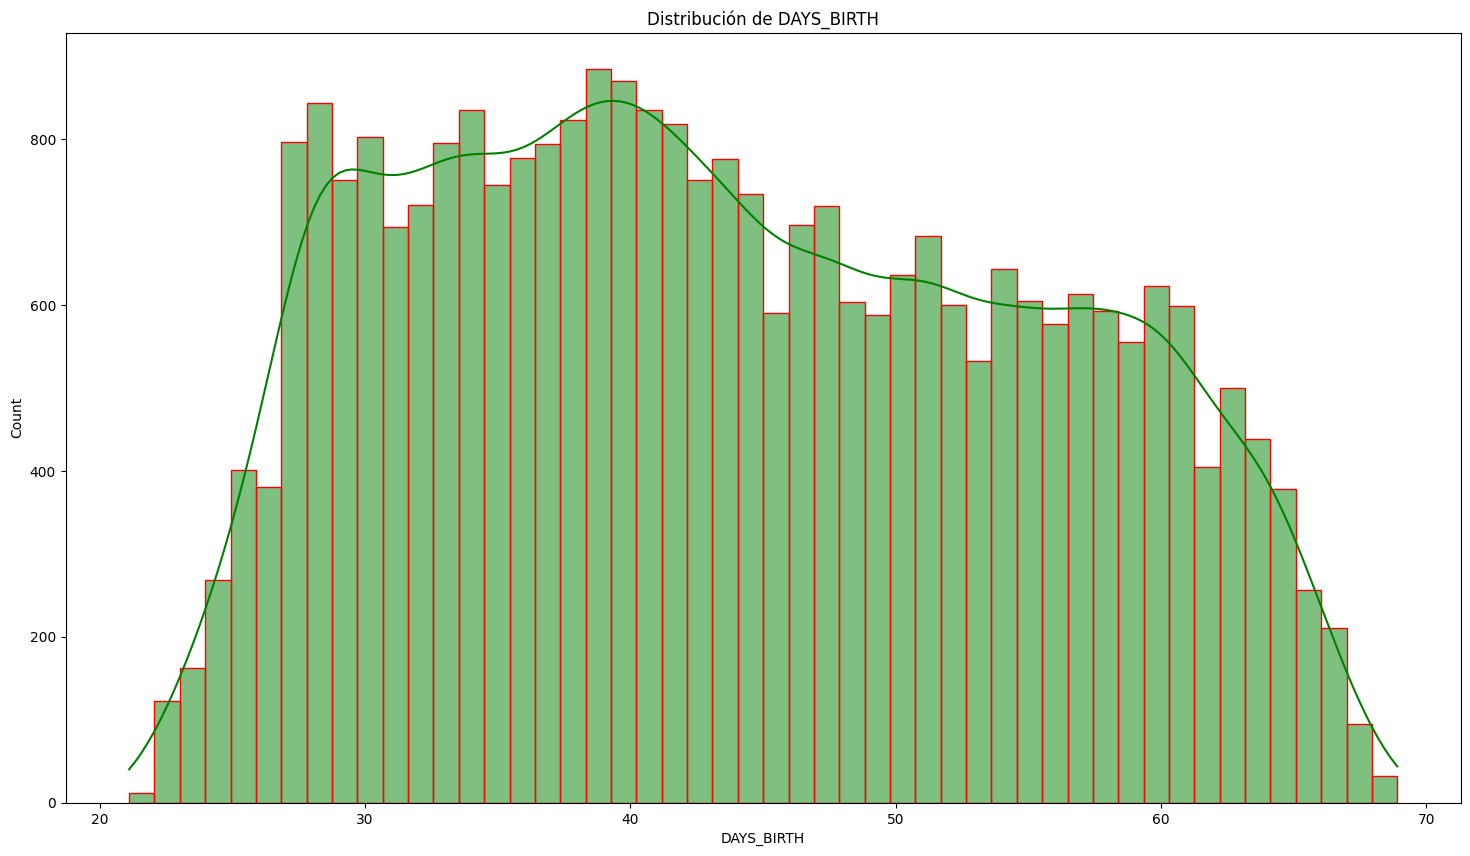

In [302]:
create_hist_plot(cc_train_copy,'DAYS_BIRTH')

El rango de los clientes es de 47 años, siendo la mínima de 21 y la máxima de 68 años. Nos da un promedio de 43.7.

### Estado civil

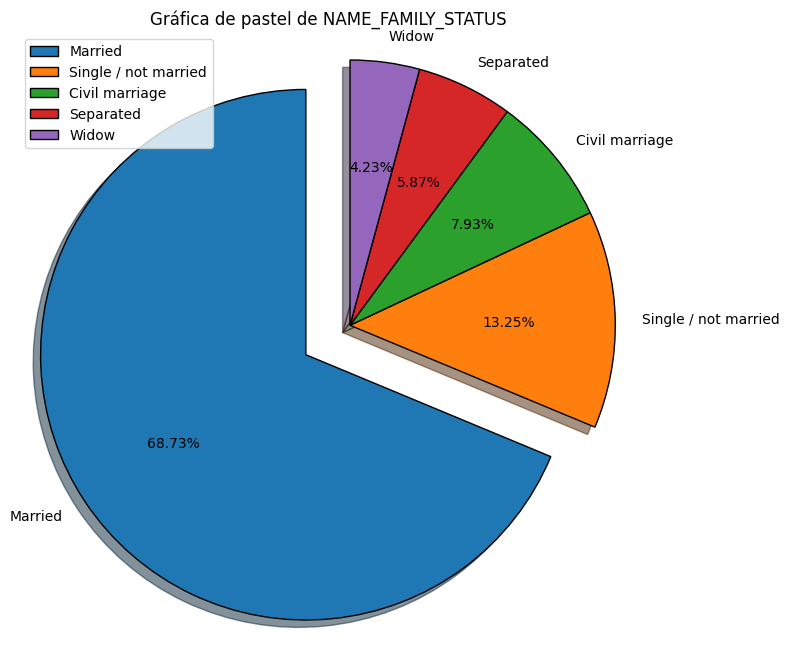

In [303]:
create_pie_plot(cc_train_copy,'NAME_FAMILY_STATUS')

Gran parte de los clientes se encuentra casado. Recordemos que el promedio de edad de los clientes está en los 44 años.

### Tipo de residencia

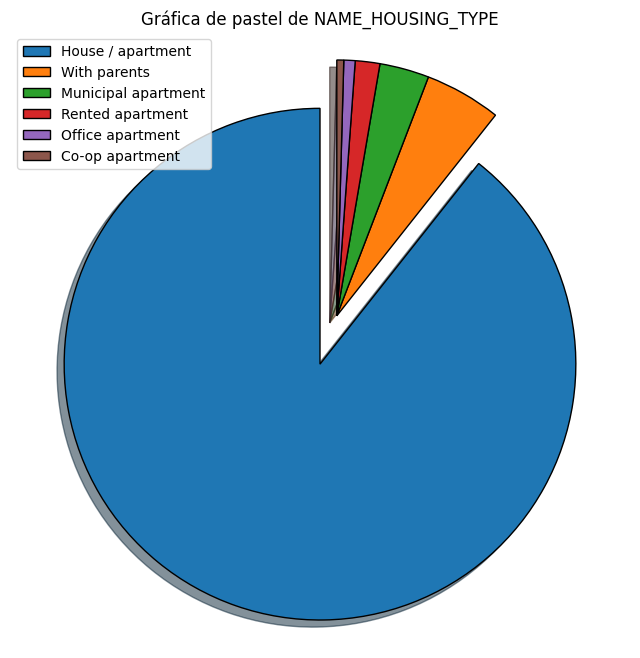

In [304]:
create_pie_plot(cc_train_copy,'NAME_HOUSING_TYPE')

Casi todos los clientes viven en una casa o departamento. Siendo la mínoría
quienes viven en residencias compartidas.

### Escolaridad

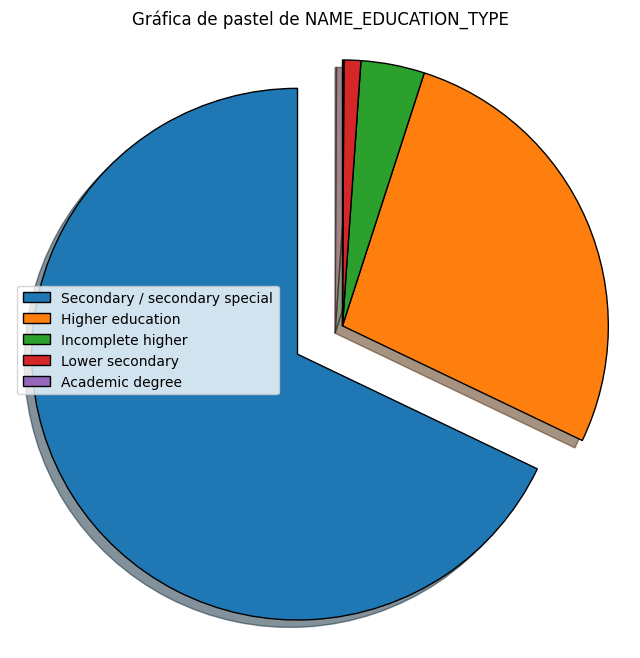

In [305]:
create_pie_plot(cc_train_copy,'NAME_EDUCATION_TYPE')

La mayoría de los aplicantes no recibieron una educación profesional.

### Ingreso

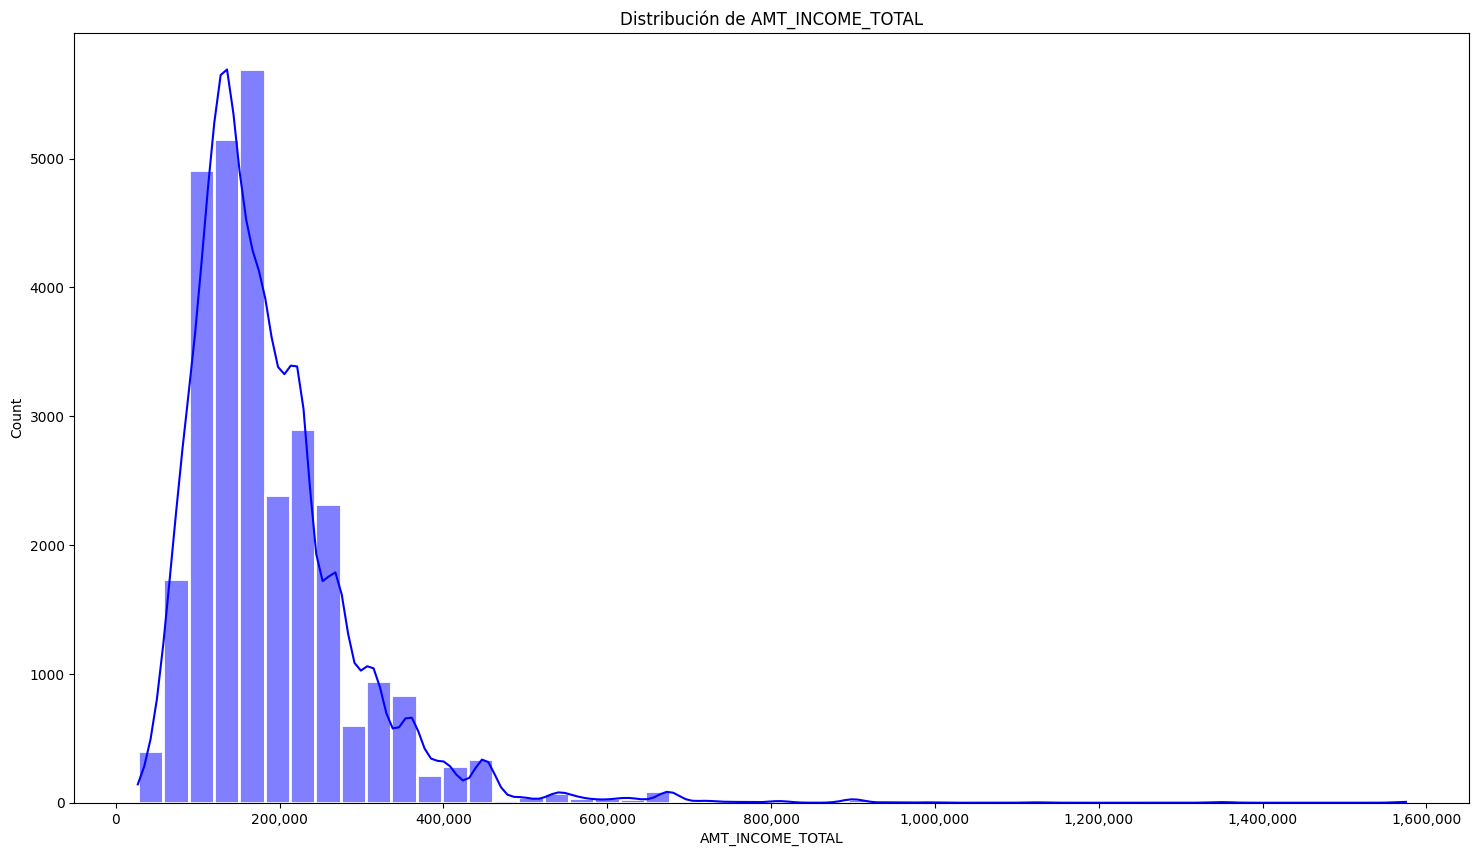

In [306]:
create_hist_plot(cc_train_copy,'AMT_INCOME_TOTAL')

Encontramos una distribución, prácticamente, normal. Sin embargo, tenemos unos muchos datos atípicos de personas que generan más de \$400,000 como ingreso neto. El ingreso promedio está en los \$186,890

### Estado laboral

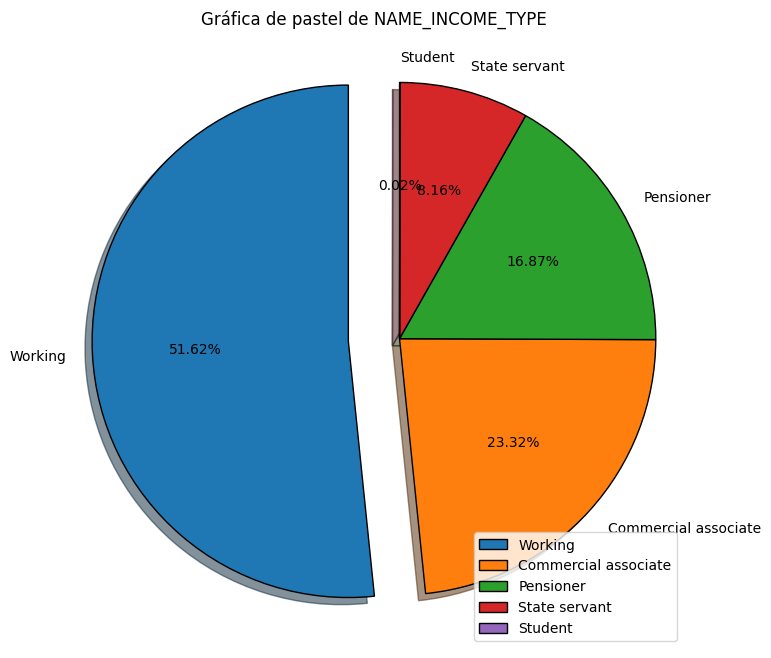

In [307]:
create_pie_plot(cc_train_copy,'NAME_INCOME_TYPE')

La mayoria de los clientes se encuentra en su etapa productiva. Como es de esperarse, los estudiantes son el grupo que menos solicita los créditos.

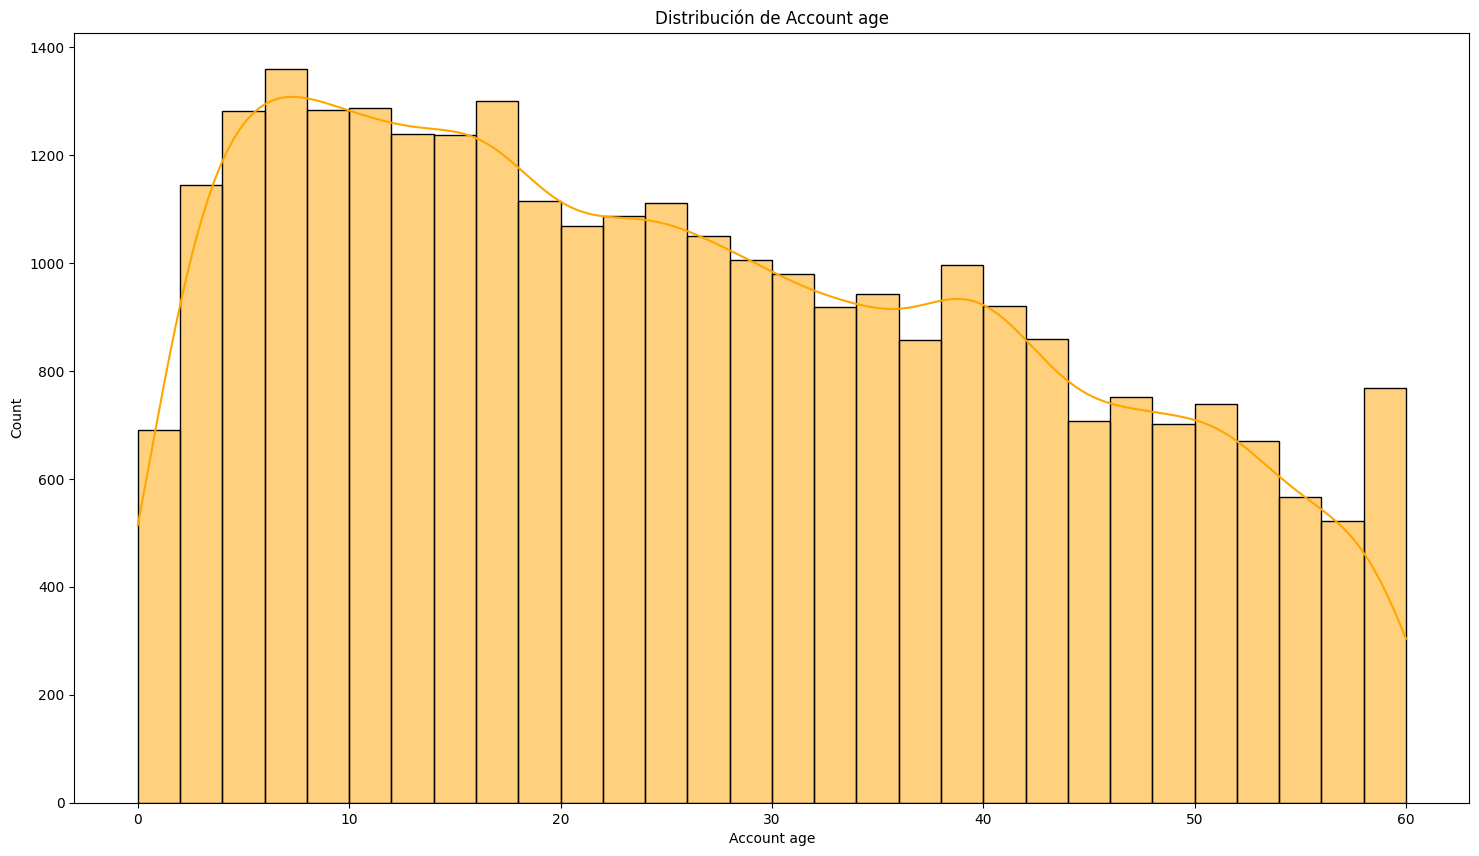

In [308]:
create_hist_plot(cc_train_copy,'Account age', the_bins=30)

La mayoría de las cuentas que solicitan el crédito tienen al menos 26 meses de haber sido abiertas.



---


### **Resumen**

El cliente promedio resulta ser una mujer casada, entre los 40-45 años, que cuenta con una propiedad donde está viviendo y tiene trabajando, al menos, 5 años con un salario neto de \$157,500, sin haber cursado la educación superior. Su cuenta de banco es de unos 25 meses de antigüedad.

---
